In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv(r'C:\Users\prate\Downloads\avocado.csv')

In [109]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [110]:
df.isnull().sum().any()

False

We see that we do not have any null values in the dataset

In [111]:
df['date'] = pd.to_datetime(df['Date'],format="%Y/%m/%d").dt.day
df['Month'] = pd.to_datetime(df['Date'],format="%Y/%m/%d").dt.month

In [112]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  date  Month  
0      2015            Albany    27     12  
1      2015            Albany    20     12  
2      2015            Albany    13     12  
3      2015            Albany     6     12  
4      2015            Albany    29     11  
...     ...               ...   ...    ...  
18244  2018  WestTexNewMexico     4      2  
18245  2018  WestTexNewMexico    28      1  
18246  2018  WestTexNewMexico    21      1  
18247  2018  WestTexNewMexico    14      1  
18248  2018  WestTexNewMexico     7      1  

[18249 rows x 16 columns]

Since we already have date, month and year, we could drop Date column.

We see that total bags is an addition of 'Small Bags','Large Bags' and 'XLarge Bags'.

In [113]:
df.drop('Date',axis=1,inplace=True)

In [114]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year          date         Month  
count  18249.000000  18249.000000  18249.000000  
mean    2016.147899     15.662612      6.177215  
std        0.939938      8.776281      3.534130  
min     2015.000000      1.000000      1.000000  
25%     2015.000000      8.000000      3.000000  
50%     2016.000000     16.000000      6.000000  
75%     2017.000000     23.000000      9.000000  
max     2018.000000     31.000000     12.000000

In [115]:
df.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
date              int64
Month             int64
dtype: object

In [116]:
df.nunique().sort_values(ascending=False)

Total Volume    18237
4225            18103
Total Bags      18097
4046            17702
Small Bags      17321
Large Bags      15082
4770            12071
XLarge Bags      5588
AveragePrice      259
region             54
Unnamed: 0         53
date               31
Month              12
year                4
type                2
dtype: int64

We see that we have 3 object type columns and rest are float and int

In [117]:
non_cat_columns = ['Total Volume','4225','Total Bags','4046','Small Bags','Large Bags','4770','XLarge Bags','AveragePrice']

In [118]:
descrete_columns = ['Date','Unnamed: 0','Month','year']

In [119]:
cat_columns = ['region','type']

In [120]:
df

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  date  Month  
0                Albany    27     12  
1                Albany    20     12  
2                Albany    13     12  
3                Albany     6     12  
4                Albany    29     11  
...                 ...   ...    ...  
18244  WestTexNewMexico     4      2  
18245  WestTexNewMexico    28      1  
18246  WestTexNewMexico    21      1  
18247  WestTexNewMexico    14      1  
18248  WestTexNewMexico     7      1  

[18249 rows x 15 columns]

### Visualization

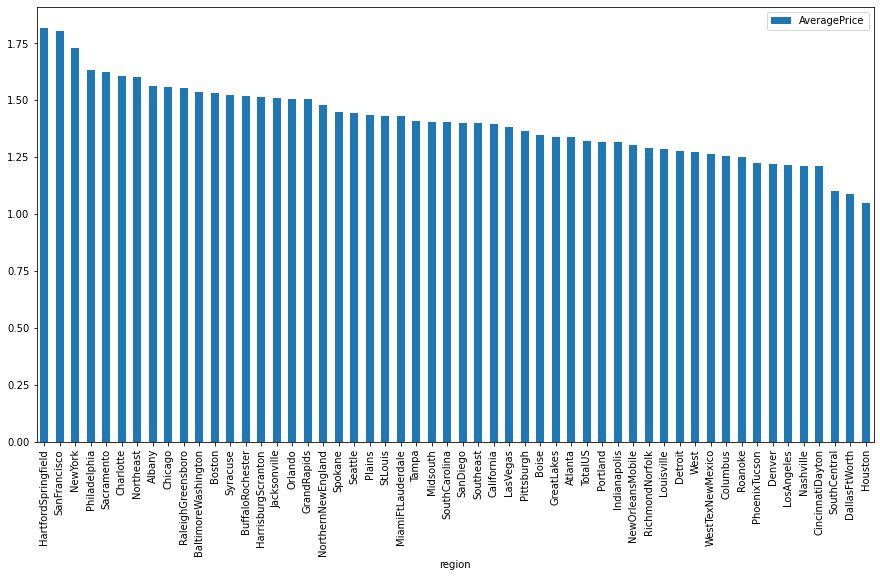

In [121]:
region_avg_price = df.pivot_table(index='region',values='AveragePrice').sort_values(by='AveragePrice',ascending=False)
region_avg_price
region_avg_price.plot(kind='bar',figsize=(15,8))
plt.show()

We see that the Average price is highest in HartfordSpringfield and lowest in Houston

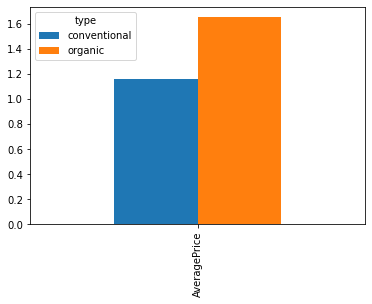

In [122]:
type_avgprice = df.pivot_table(values='AveragePrice',columns='type')
type_avgprice
type_avgprice.plot(kind='bar')
plt.show()

We see the price for organic Avacado is Higher than that of Conventional

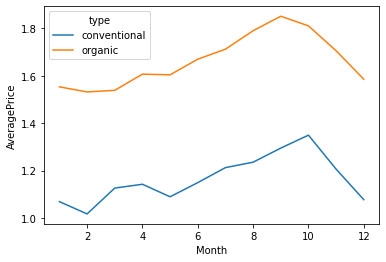

In [123]:
MonthlyPrice_Type = df.pivot_table(values='AveragePrice',index=['Month','type'])
MonthlyPrice_Type
sns.lineplot(x = 'Month',y = 'AveragePrice',hue = 'type',data=MonthlyPrice_Type)
plt.show()

We see that the prices for both Organic and Conventional type of Avacado peak between 8th to 10th month, post which they start falling and start recovering after the 3rd Month

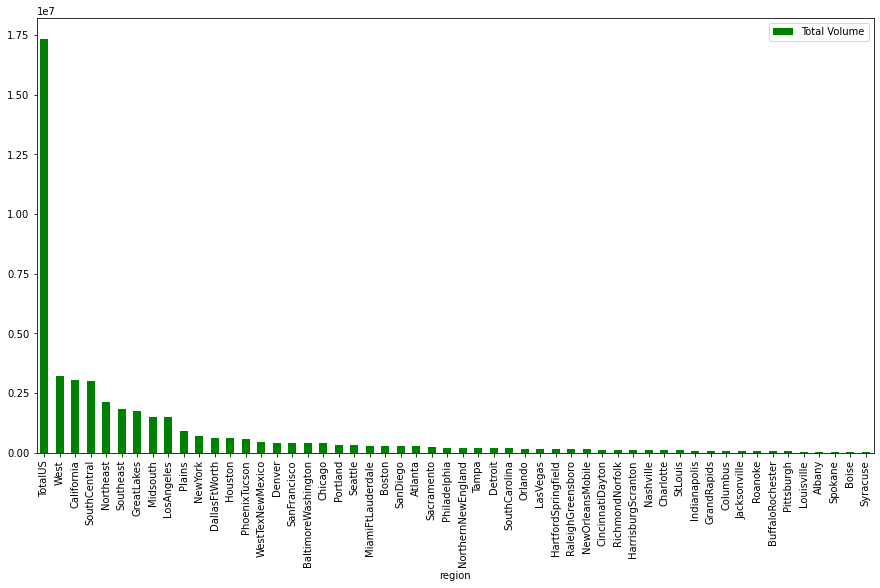

In [124]:
volume_region = df.pivot_table(values='Total Volume',index='region').sort_values(by='Total Volume',ascending=False)
volume_region
volume_region.plot(kind='bar',figsize=(15,8),color='g')
plt.show()

We see the highest volumes coming down from TotalUS which is more than 5 times that of West and definatly is an outlier,followed by West, California and SouthCentral, were as the least volumes coming down from Spokane,Boise and Syracuse

In [125]:
df = df[df['region']!='TotalUS']
df

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  date  Month  
0                Albany    27     12  
1                Albany    20     12  
2                Albany    13     12  
3                Albany     6     12  
4                Albany    29     11  
...                 ...   ...    ...  
18244  WestTexNewMexico     4      2  
18245  WestTexNewMexico    28      1  
18246  WestTexNewMexico    21      1  
18247  WestTexNewMexico    14      1  
18248  WestTexNewMexico     7      1  

[17911 rows x 15 columns]

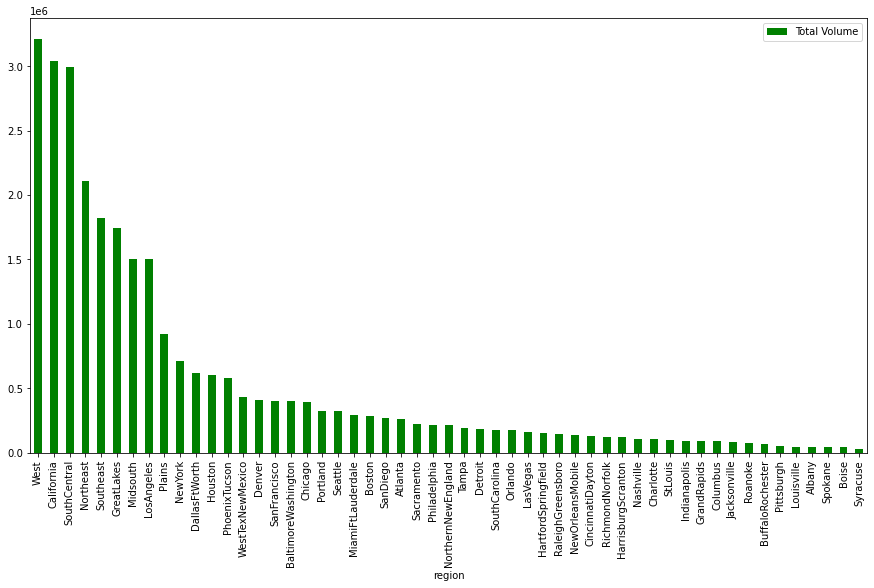

In [126]:
volume_region = df.pivot_table(values='Total Volume',index='region').sort_values(by='Total Volume',ascending=False)
volume_region
volume_region.plot(kind='bar',figsize=(15,8),color='g')
plt.show()

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

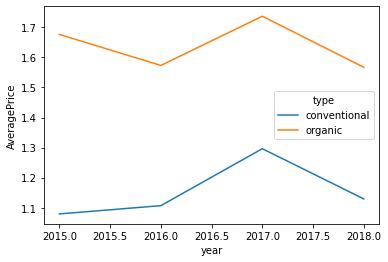

In [127]:
Price_Volume_Year = df.pivot_table(values=['AveragePrice','Total Volume'],index=['year','type'])
Price_Volume_Year
sns.lineplot(x='year',y='AveragePrice',hue='type',data=Price_Volume_Year)

we see that the prices were at the peak in 2017 and the lowest in 2015

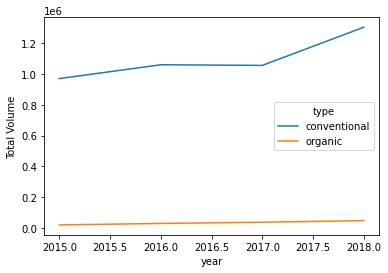

In [128]:
sns.lineplot(x='year',y='Total Volume',hue='type',data=Price_Volume_Year)
plt.show()

We see a noticible increase in the volume for Conventional Avacado's from 2015 to 2018 but the Organic Avacado volumes did not have a significant increase in the volumes.

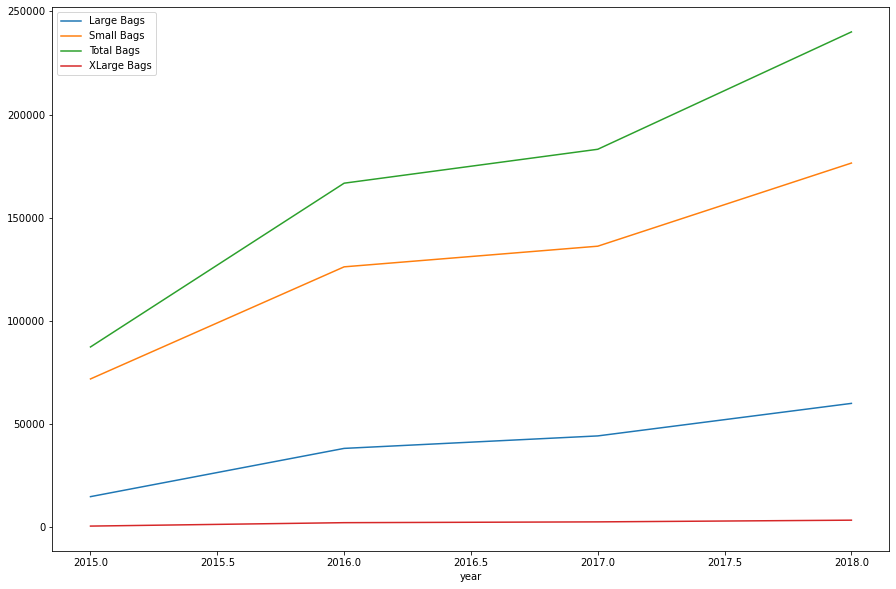

In [129]:
year_region_bags = df.pivot_table(values=['Total Bags','Small Bags','Large Bags','XLarge Bags'],index=['year'])
year_region_bags
y = ['Large Bags','Small Bags','Total Bags','XLarge Bags']
x = ['year']

year_region_bags.plot(kind='line',figsize=(15,10))
plt.show()

We see the demands for total bags is steadly increasing over the years, off which small bags are highest in demand and XLarge Bags are the least sold

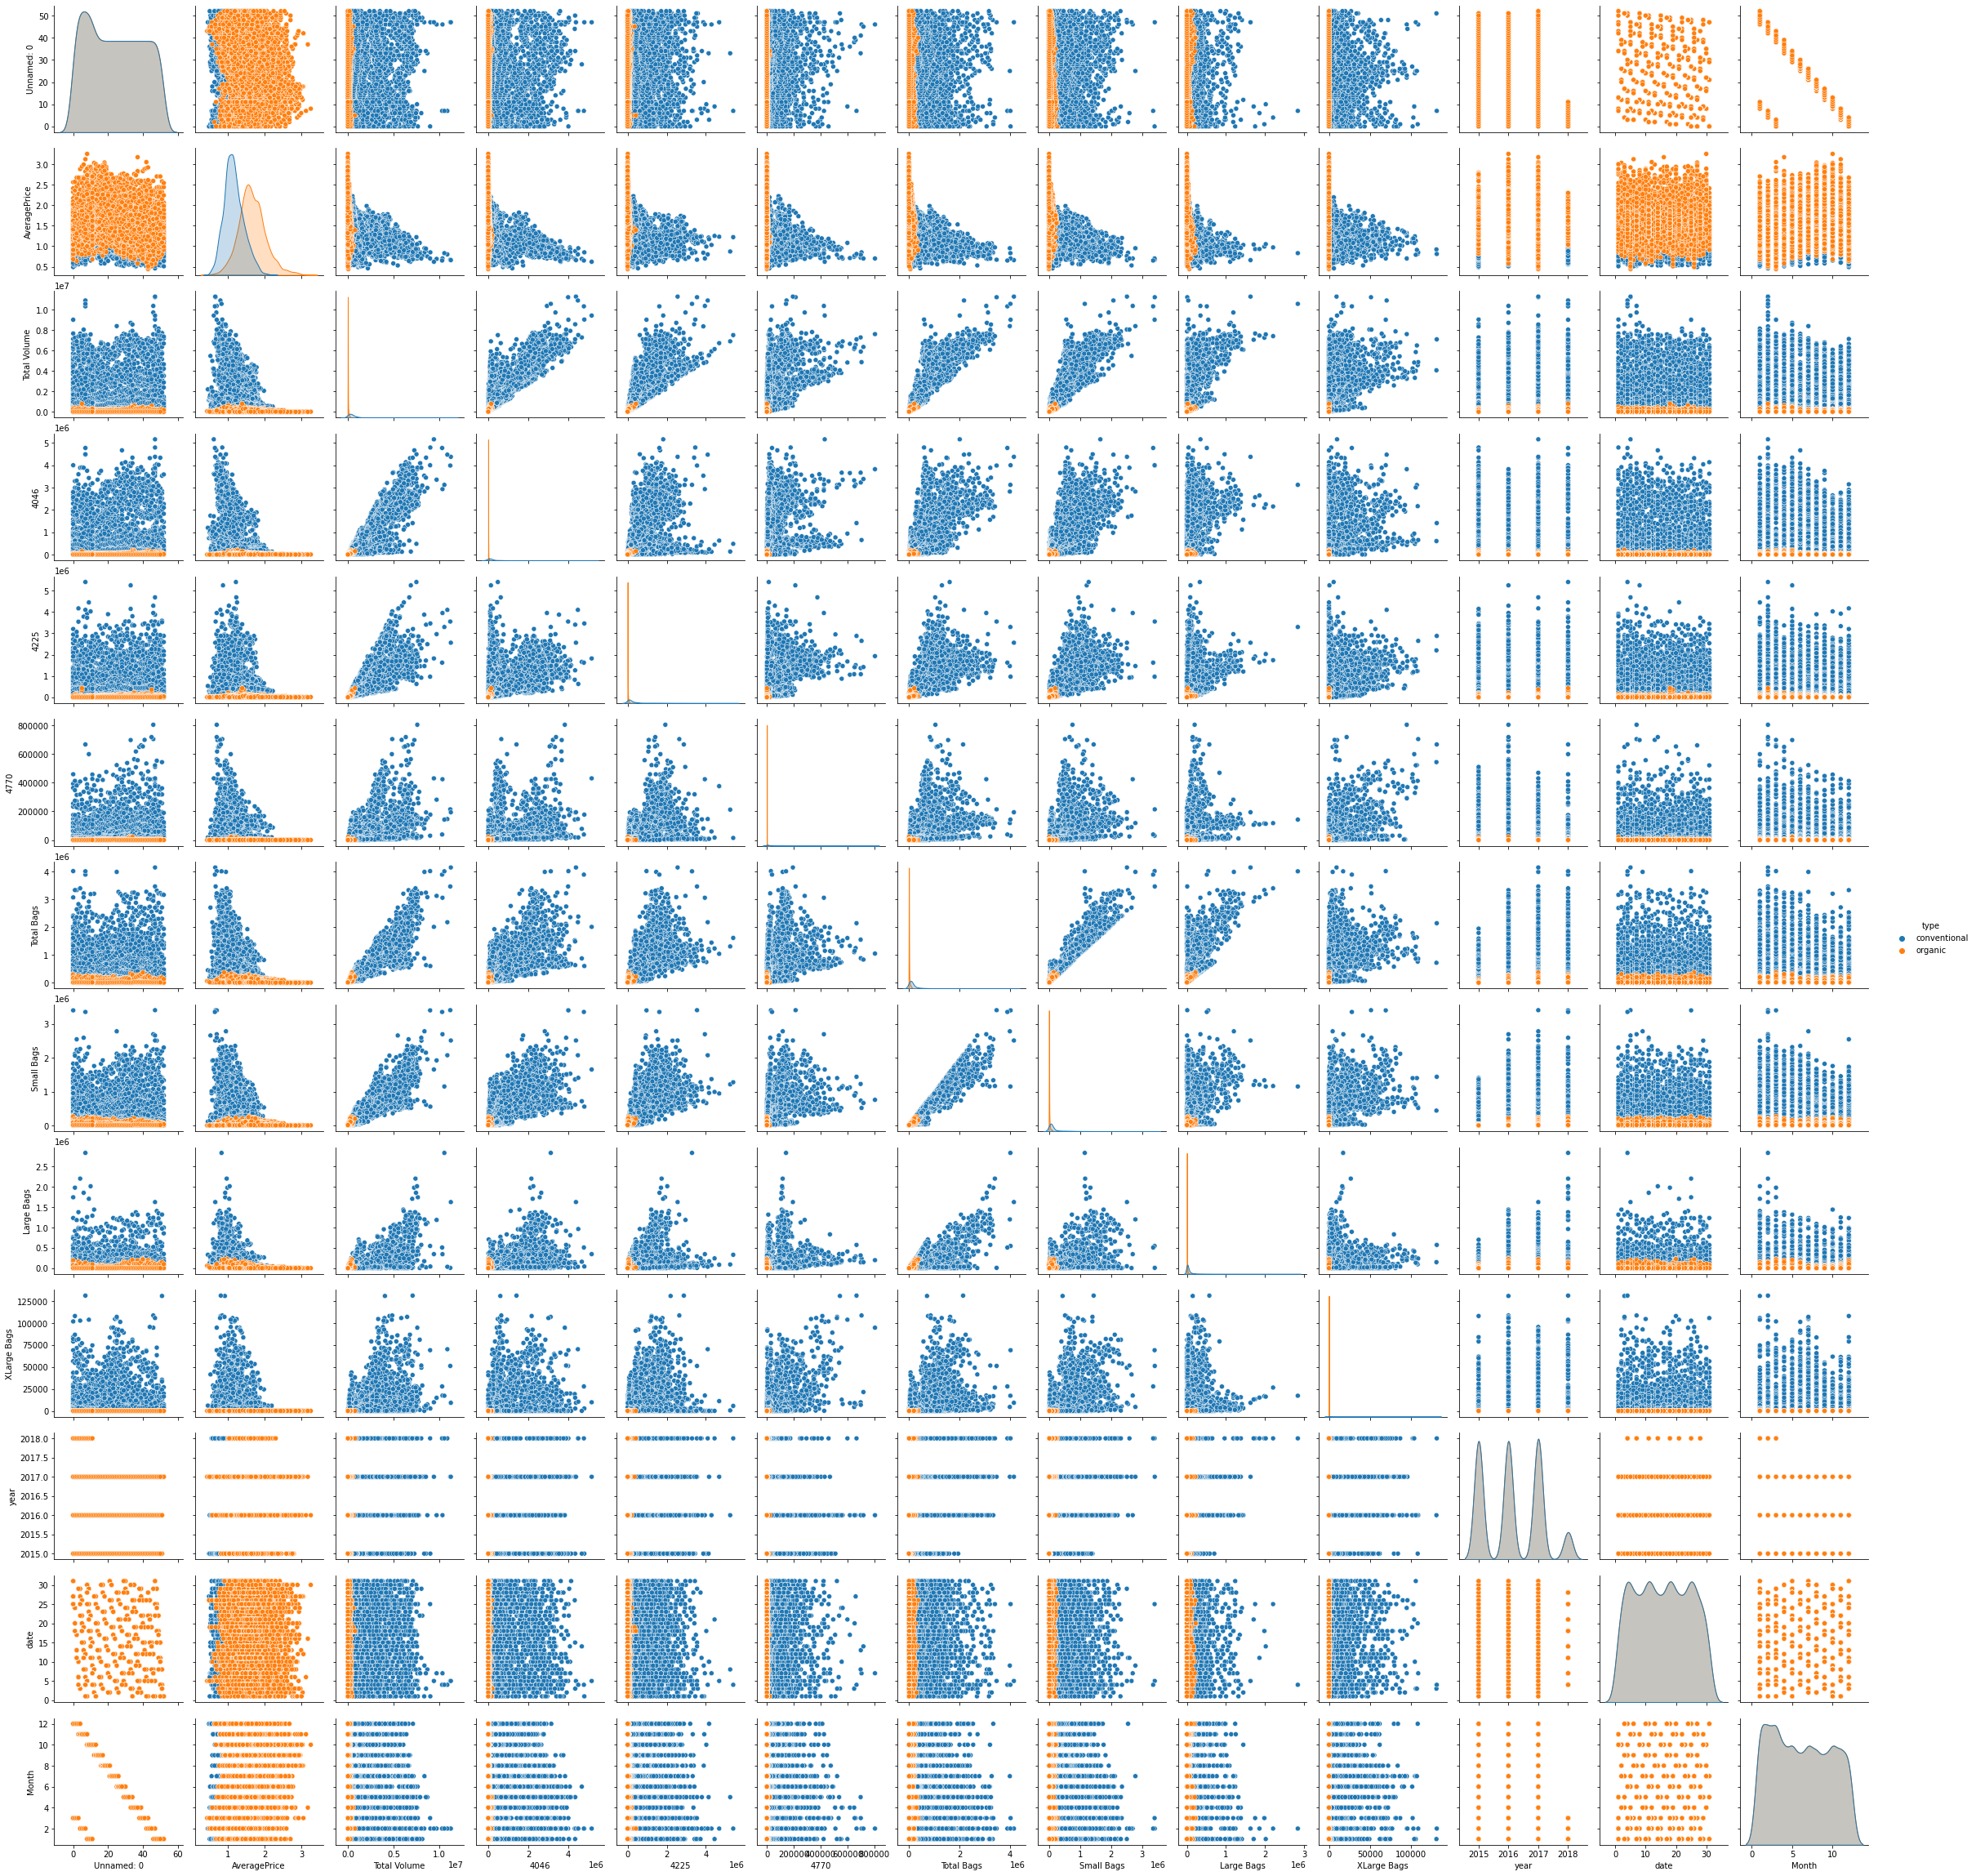

In [24]:
sns.pairplot(df,diag_kind='kde',hue='type')

We see that data is predominantly right skewed.We see alot of noise in the data

### Checking Correlation

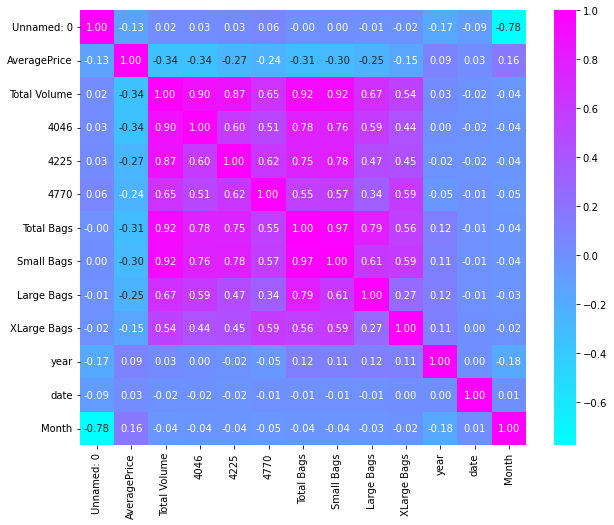

In [262]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='cool')
plt.show()

In [24]:
df.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.131750      0.024954  0.026888  0.033073   
AveragePrice   -0.131750      1.000000     -0.343982 -0.342105 -0.267643   
Total Volume    0.024954     -0.343982      1.000000  0.895002  0.872547   
4046            0.026888     -0.342105      0.895002  1.000000  0.603442   
4225            0.033073     -0.267643      0.872547  0.603442  1.000000   
4770            0.057580     -0.241213      0.649072  0.509280  0.623368   
Total Bags     -0.002897     -0.307685      0.924980  0.776373  0.754345   
Small Bags      0.001302     -0.296151      0.920763  0.761604  0.782892   
Large Bags     -0.011365     -0.248909      0.668446  0.589649  0.466107   
XLarge Bags    -0.015145     -0.154424      0.538396  0.436249  0.449903   
year           -0.171669      0.091897      0.030621  0.004244 -0.015449   
date           -0.088099      0.026849     -0.017446 -0.015711 -0.021030   
Month          -0.777730      0.161463     -0.043859 -0.039269 -0.037382   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.057580   -0.002897    0.001302   -0.011365    -0.015145   
AveragePrice -0.241213   -0.307685   -0.296151   -0.248909    -0.154424   
Total Volume  0.649072    0.924980    0.920763    0.668446     0.538396   
4046          0.509280    0.776373    0.761604    0.589649     0.436249   
4225          0.623368    0.754345    0.782892    0.466107     0.449903   
4770          1.000000    0.553417    0.566304    0.343136     0.587963   
Total Bags    0.553417    1.000000    0.969591    0.787834     0.555153   
Small Bags    0.566304    0.969591    1.000000    0.613817     0.587470   
Large Bags    0.343136    0.787834    0.613817    1.000000     0.267308   
XLarge Bags   0.587963    0.555153    0.587470    0.267308     1.000000   
year         -0.050252    0.122705    0.108639    0.118942     0.110051   
date         -0.012440   -0.008652   -0.006622   -0.011518     0.000477   
Month        -0.046055   -0.039293   -0.039521   -0.027787    -0.017466   

                  year      date     Month  
Unnamed: 0   -0.171669 -0.088099 -0.777730  
AveragePrice  0.091897  0.026849  0.161463  
Total Volume  0.030621 -0.017446 -0.043859  
4046          0.004244 -0.015711 -0.039269  
4225         -0.015449 -0.021030 -0.037382  
4770         -0.050252 -0.012440 -0.046055  
Total Bags    0.122705 -0.008652 -0.039293  
Small Bags    0.108639 -0.006622 -0.039521  
Large Bags    0.118942 -0.011518 -0.027787  
XLarge Bags   0.110051  0.000477 -0.017466  
year          1.000000  0.004472 -0.177048  
date          0.004472  1.000000  0.010623  
Month        -0.177048  0.010623  1.000000

We see that the features are highly correlated with each other but the correlation with Target Varriable Average Price is Minimal

### Checking Skewness

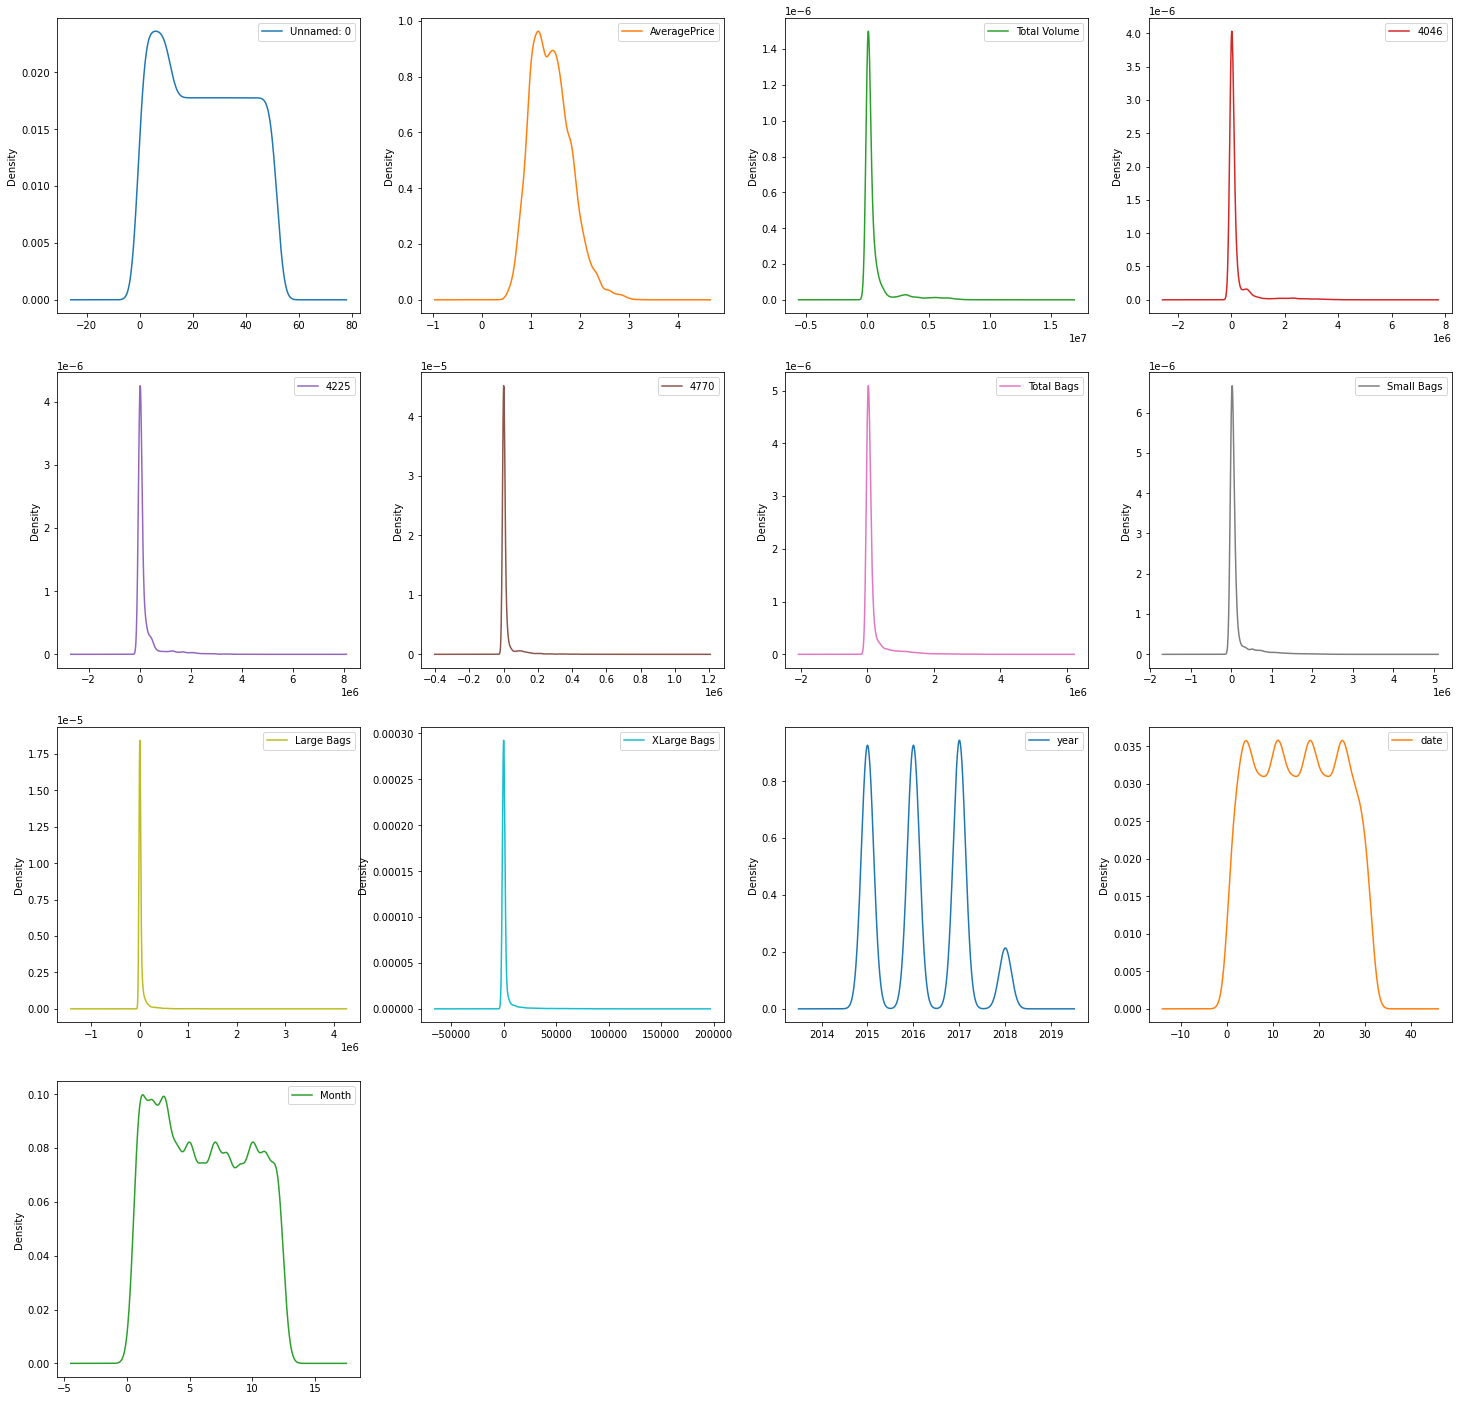

In [25]:
df.plot(kind='density',subplots=True,figsize=(25,25),layout=(4,4),sharex=False)
plt.show()

In [26]:
df.skew().sort_values(ascending=False)

Large Bags      7.916074
XLarge Bags     6.952878
4770            6.259901
Total Bags      4.497227
4046            4.423296
Small Bags      4.284061
4225            4.127037
Total Volume    3.608709
AveragePrice    0.577132
year            0.215342
Unnamed: 0      0.108335
Month           0.106618
date            0.014311
dtype: float64

Keeping the skewness threshold as 1.25, we see a very high skewness in

    Large Bags      7.916074
    XLarge Bags     6.952878
    4770            6.259901
    Total Bags      4.497227
    4046            4.423296
    Small Bags      4.284061
    4225            4.127037
    Total Volume    3.608709

### Encoding Object Type Columns

In [130]:
df = pd.get_dummies(df,columns=['type'])

In [131]:
df

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  year  \
0         8696.87     8603.62       93.25          0.0  2015   
1         9505.56     9408.07       97.49          0.0  2015   
2         8145.35     8042.21      103.14          0.0  2015   
3         5811.16     5677.40      133.76          0.0  2015   
4         6183.95     5986.26      197.69          0.0  2015   
...           ...         ...         ...          ...   ...   
18244    13498.67    13066.82      431.85          0.0  2018   
18245     9264.84     8940.04      324.80          0.0  2018   
18246     9394.11     9351.80       42.31          0.0  2018   
18247    10969.54    10919.54       50.00          0.0  2018   
18248    12014.15    11988.14       26.01          0.0  2018   

                 region  date  Month  type_conventional  type_organic  
0                Albany    27     12                  1             0  
1                Albany    20     12                  1             0  
2                Albany    13     12                  1             0  
3                Albany     6     12                  1             0  
4                Albany    29     11                  1             0  
...                 ...   ...    ...                ...           ...  
18244  WestTexNewMexico     4      2                  0             1  
18245  WestTexNewMexico    28      1                  0             1  
18246  WestTexNewMexico    21      1                  0             1  
18247  WestTexNewMexico    14      1                  0             1  
18248  WestTexNewMexico     7      1                  0             1  

[17911 rows x 16 columns]

In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17911 non-null  int64  
 1   AveragePrice       17911 non-null  float64
 2   Total Volume       17911 non-null  float64
 3   4046               17911 non-null  float64
 4   4225               17911 non-null  float64
 5   4770               17911 non-null  float64
 6   Total Bags         17911 non-null  float64
 7   Small Bags         17911 non-null  float64
 8   Large Bags         17911 non-null  float64
 9   XLarge Bags        17911 non-null  float64
 10  year               17911 non-null  int64  
 11  region             17911 non-null  int32  
 12  date               17911 non-null  int64  
 13  Month              17911 non-null  int64  
 14  type_conventional  17911 non-null  uint8  
 15  type_organic       17911 non-null  uint8  
dtypes: float64(9), int32(1

We do not have any object type columns anymore

### Checking outliers

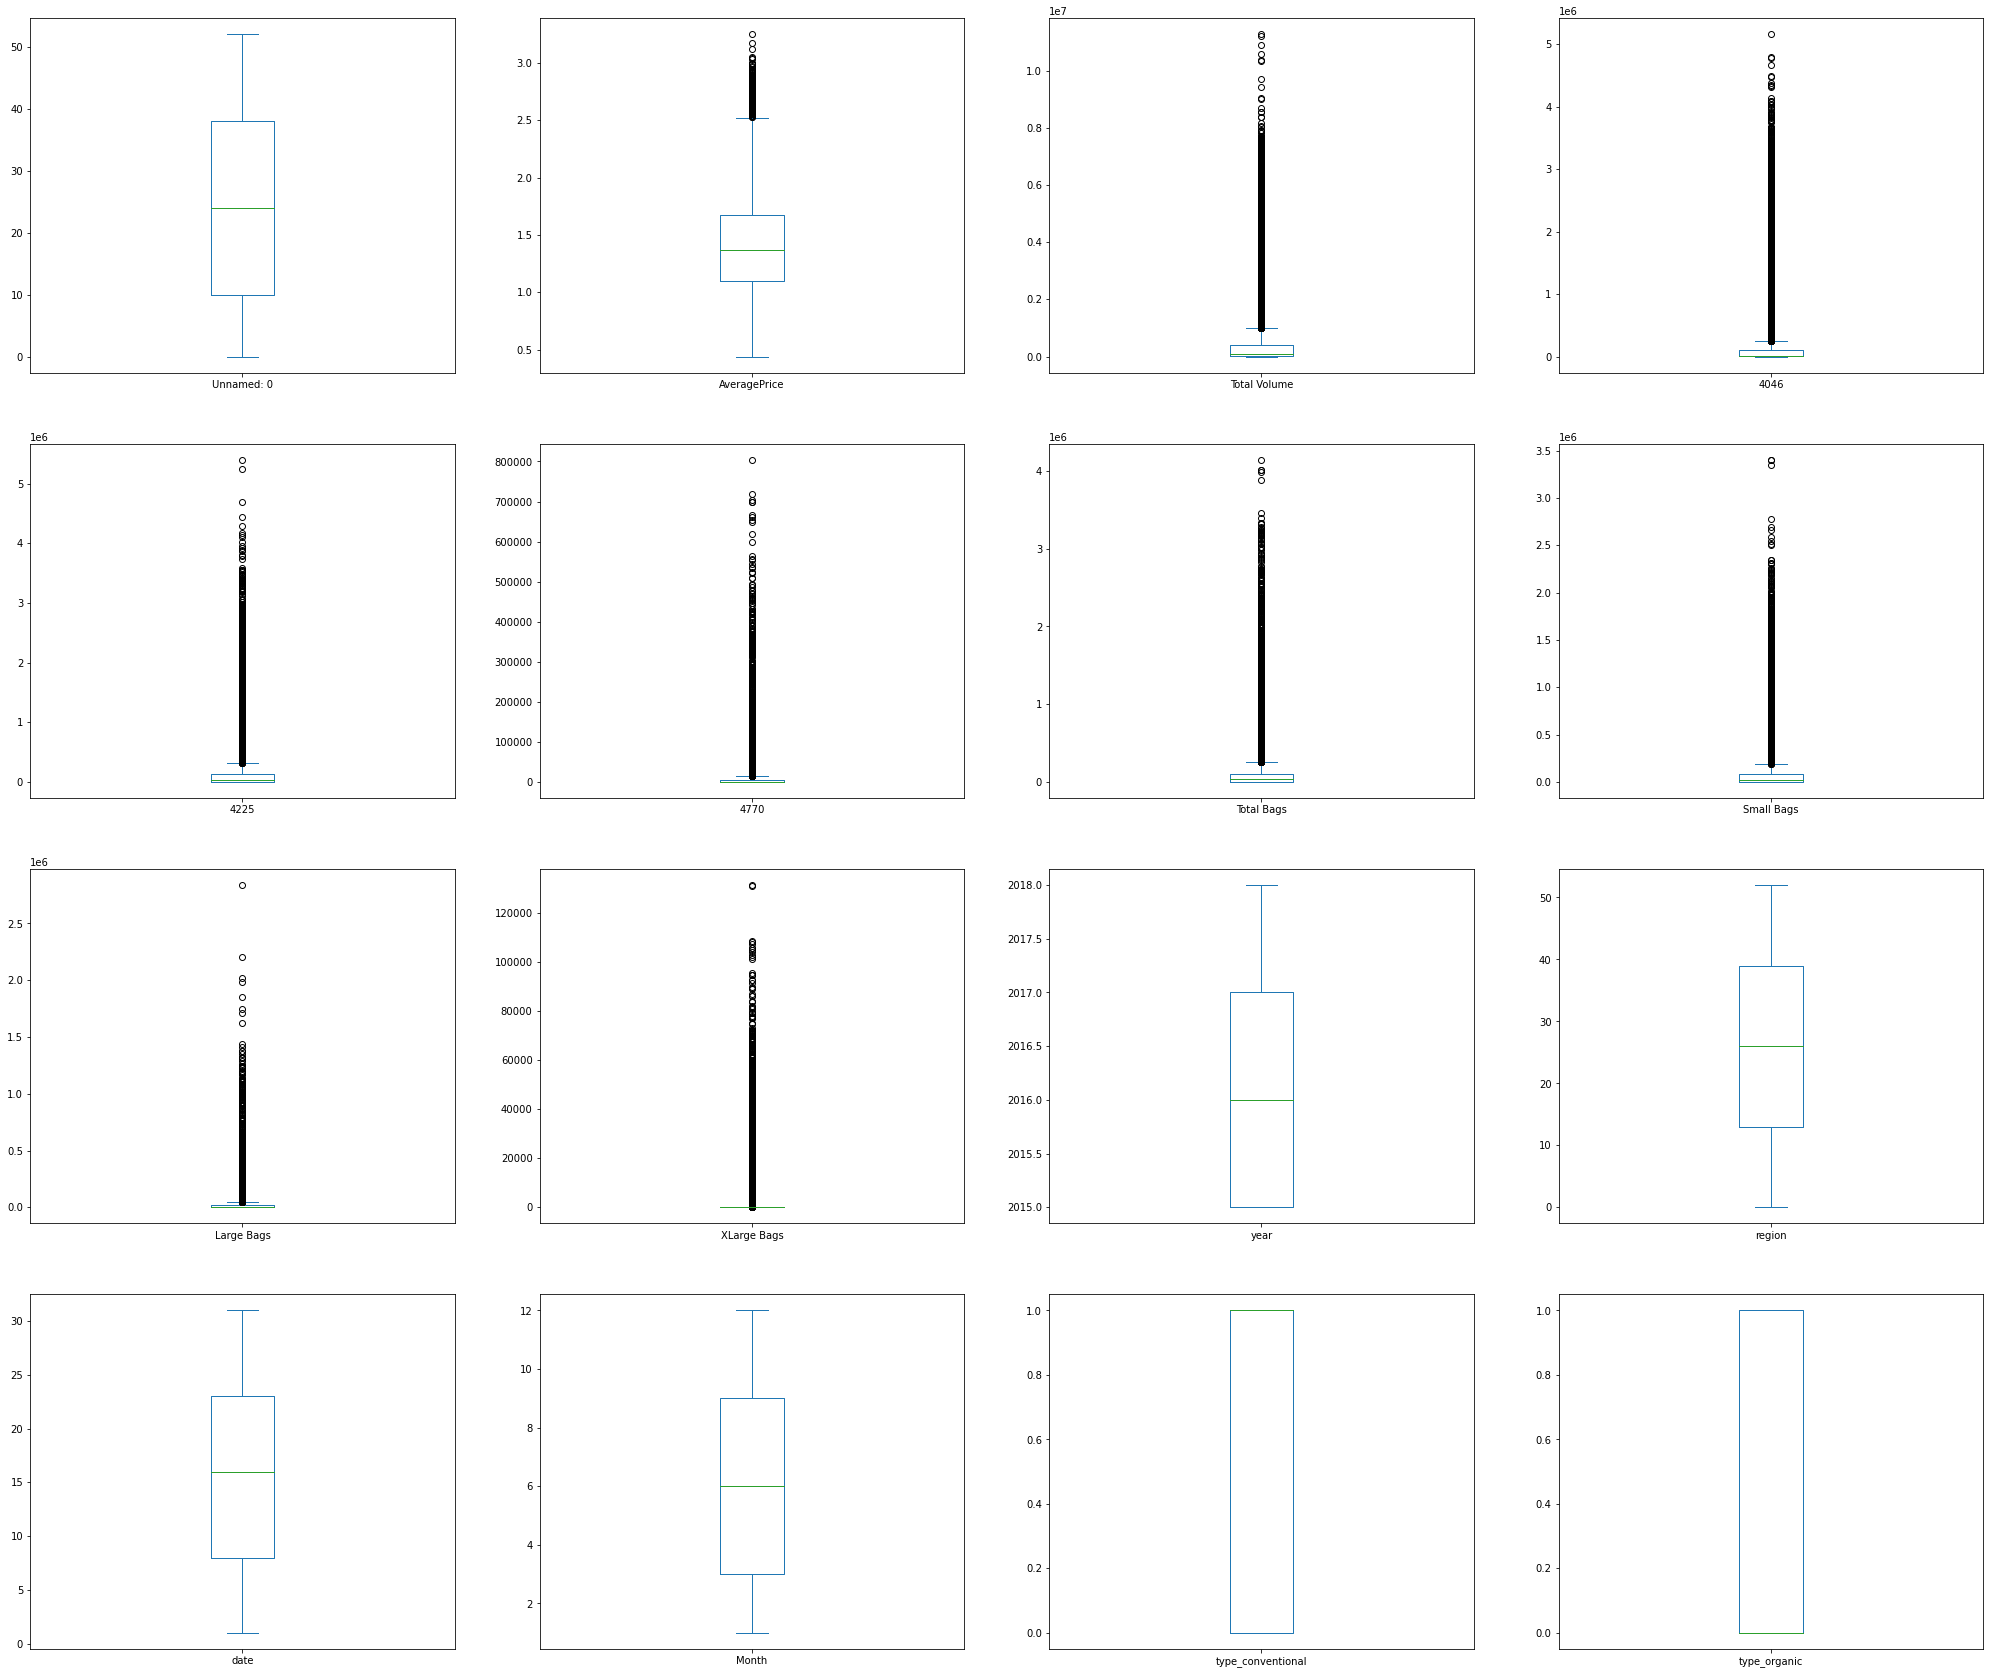

In [31]:
df.plot(kind='box',subplots=True,figsize=(35,30),layout=(4,4))
plt.show()

In [134]:
from scipy.stats import zscore

(np.abs(zscore(df)<3).all())

Unnamed: 0            True
AveragePrice         False
Total Volume         False
4046                 False
4225                 False
4770                 False
Total Bags           False
Small Bags           False
Large Bags           False
XLarge Bags          False
year                  True
region                True
date                  True
Month                 True
type_conventional     True
type_organic          True
dtype: bool

We see that we have outliers present in 

    AveragePrice         
    Total Volume         
    4046                 
    4225                 
    4770                 
    Total Bags           
    Small Bags           
    Large Bags           
    XLarge Bags          

### Removing outliers

In [135]:
z = np.abs(zscore(df))
z.shape

(17911, 16)

In [136]:
df = df[(z<3).all(axis=1)]
df.shape

(16489, 16)

### Percentage Data Loss

In [137]:
percentage_loss = (17911-16489)/17911*100
percentage_loss

7.939255206297806

### Splitting the data in x and y

In [138]:
x = df.drop('region',axis=1)
x.shape

(16489, 15)

In [139]:
y = df['region']
y.shape

(16489,)

### Normalizing the data using power_transform

In [140]:
x.skew().sort_values(ascending = False)

XLarge Bags          5.605643
4770                 5.120946
Large Bags           4.353749
4046                 3.975794
Small Bags           3.969263
Total Bags           3.645998
4225                 3.534576
Total Volume         3.147350
AveragePrice         0.356041
year                 0.224731
type_conventional    0.142651
Unnamed: 0           0.110679
Month                0.103318
date                 0.011383
type_organic        -0.142651
dtype: float64

Lets set skewness threshold as 1.25

In [141]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [142]:
x = pd.DataFrame(x_new,columns=x.columns)
x

Unnamed: 0  AveragePrice  Total Volume      4046      4225      4770  \
0       -1.966757     -0.170536      0.016606 -0.600481  0.496206 -0.106016   
1       -1.789347     -0.116945     -0.062536 -0.726240  0.403250 -0.056234   
2       -1.644385     -1.345644      0.328869 -0.678640  0.838242  0.151887   
3       -1.517151     -0.880006      0.121436 -0.574326  0.630222  0.000467   
4       -1.401661     -0.306448     -0.098767 -0.628979  0.394891  0.011644   
...           ...           ...           ...       ...       ...       ...   
16484   -1.099530      0.591037     -0.630952 -0.393942 -0.894934 -1.192086   
16485   -1.009046      0.780176     -0.728248 -0.558962 -0.627302 -1.192086   
16486   -0.922336      1.143055     -0.732357 -0.558906 -0.741456  0.585816   
16487   -0.838885      1.274200     -0.655663 -0.483960 -0.675672  0.585499   
16488   -0.758291      0.567012     -0.619585 -0.285008 -0.754837  0.290594   

       Total Bags  Small Bags  Large Bags  XLarge Bags      year      date  \
0       -0.499509   -0.294546   -0.726466    -0.627473 -1.214835  1.228554   
1       -0.457084   -0.254451   -0.716060    -0.627473 -1.214835  0.538521   
2       -0.530478   -0.324465   -0.702806    -0.627473 -1.214835 -0.219208   
3       -0.686248   -0.474167   -0.640626    -0.627473 -1.214835 -1.094895   
4       -0.658042   -0.451890   -0.543996    -0.627473 -1.214835  1.416572   
...           ...         ...         ...          ...       ...       ...   
16484   -0.285207   -0.102426   -0.338939    -0.627473  1.975660 -1.385174   
16485   -0.469370   -0.277406   -0.415551    -0.627473  1.975660  1.323008   
16486   -0.462737   -0.257159   -0.903225    -0.627473  1.975660  0.640578   
16487   -0.387764   -0.186424   -0.867164    -0.627473  1.975660 -0.105484   
16488   -0.343117   -0.143019   -1.004264    -0.627473  1.975660 -0.958572   

          Month  type_conventional  type_organic  
0      1.489591           1.073859     -1.073859  
1      1.489591           1.073859     -1.073859  
2      1.489591           1.073859     -1.073859  
3      1.489591           1.073859     -1.073859  
4      1.273686           1.073859     -1.073859  
...         ...                ...           ...  
16484 -1.221786          -0.931221      0.931221  
16485 -1.641575          -0.931221      0.931221  
16486 -1.641575          -0.931221      0.931221  
16487 -1.641575          -0.931221      0.931221  
16488 -1.641575          -0.931221      0.931221  

[16489 rows x 15 columns]

In [143]:
(x.skew())

Unnamed: 0          -0.242414
AveragePrice        -0.001136
Total Volume        -0.036696
4046                -0.051553
4225                -0.072390
4770                 0.047409
Total Bags          -0.059451
Small Bags          -0.073857
Large Bags          -0.125451
XLarge Bags          1.009043
year                 0.222468
date                -0.208962
Month               -0.147660
type_conventional    0.142651
type_organic        -0.142651
dtype: float64

We see the skewness is within the threshold 1.25

### VIF

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
    return vif.sort_values(by='VIF_Values',ascending=False)

In [146]:
check_vif = ['Total Volume','Unnamed: 0',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']
Features = x[check_vif]
calculate_vif(Features)

Features  VIF_Values
0  Total Volume   47.377668
5    Total Bags   32.203289
6    Small Bags   16.310329
3          4225   10.474851
2          4046    6.176892
7    Large Bags    3.264666
4          4770    3.026066
8   XLarge Bags    1.651323
1    Unnamed: 0    1.031113

##### As seen earlier, Total Bags is just  a sum of Small Bags, Large Bags and XLarge Bags. We could drop it. We also see a high correlation with total volume hence we could drop that too.

In [147]:
x.drop(['Total Bags','Total Volume'],axis=1,inplace=True)

In [148]:
check_vif = ['Unnamed: 0',
 '4046',
 '4225',
 '4770',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']
Features = x[check_vif]
calculate_vif(Features)

Features  VIF_Values
2         4225    3.381143
4   Small Bags    3.182540
3         4770    3.013898
1         4046    2.866903
6  XLarge Bags    1.649832
5   Large Bags    1.534960
0   Unnamed: 0    1.029786

We see that the VIF values are well with in the threshold 5

In [149]:
x

Unnamed: 0  AveragePrice      4046      4225      4770  Small Bags  \
0       -1.966757     -0.170536 -0.600481  0.496206 -0.106016   -0.294546   
1       -1.789347     -0.116945 -0.726240  0.403250 -0.056234   -0.254451   
2       -1.644385     -1.345644 -0.678640  0.838242  0.151887   -0.324465   
3       -1.517151     -0.880006 -0.574326  0.630222  0.000467   -0.474167   
4       -1.401661     -0.306448 -0.628979  0.394891  0.011644   -0.451890   
...           ...           ...       ...       ...       ...         ...   
16484   -1.099530      0.591037 -0.393942 -0.894934 -1.192086   -0.102426   
16485   -1.009046      0.780176 -0.558962 -0.627302 -1.192086   -0.277406   
16486   -0.922336      1.143055 -0.558906 -0.741456  0.585816   -0.257159   
16487   -0.838885      1.274200 -0.483960 -0.675672  0.585499   -0.186424   
16488   -0.758291      0.567012 -0.285008 -0.754837  0.290594   -0.143019   

       Large Bags  XLarge Bags      year      date     Month  \
0       -0.726466    -0.627473 -1.214835  1.228554  1.489591   
1       -0.716060    -0.627473 -1.214835  0.538521  1.489591   
2       -0.702806    -0.627473 -1.214835 -0.219208  1.489591   
3       -0.640626    -0.627473 -1.214835 -1.094895  1.489591   
4       -0.543996    -0.627473 -1.214835  1.416572  1.273686   
...           ...          ...       ...       ...       ...   
16484   -0.338939    -0.627473  1.975660 -1.385174 -1.221786   
16485   -0.415551    -0.627473  1.975660  1.323008 -1.641575   
16486   -0.903225    -0.627473  1.975660  0.640578 -1.641575   
16487   -0.867164    -0.627473  1.975660 -0.105484 -1.641575   
16488   -1.004264    -0.627473  1.975660 -0.958572 -1.641575   

       type_conventional  type_organic  
0               1.073859     -1.073859  
1               1.073859     -1.073859  
2               1.073859     -1.073859  
3               1.073859     -1.073859  
4               1.073859     -1.073859  
...                  ...           ...  
16484          -0.931221      0.931221  
16485          -0.931221      0.931221  
16486          -0.931221      0.931221  
16487          -0.931221      0.931221  
16488          -0.931221      0.931221  

[16489 rows x 13 columns]

In [150]:
y.shape

(16489,)

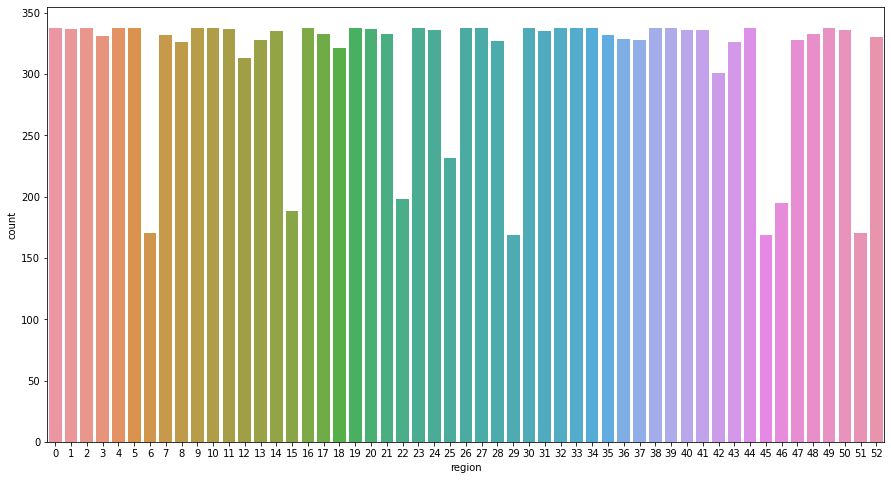

In [151]:
plt.figure(figsize=(15,8))
sns.countplot(y)
plt.show()

### We see the data is imbalance, using SMOTE, balancing the data

In [152]:
from imblearn.over_sampling import SMOTE

In [153]:
sm = SMOTE()
dfx,dfy = sm.fit_resample(x,y)

In [154]:
dfx.shape

(17914, 13)

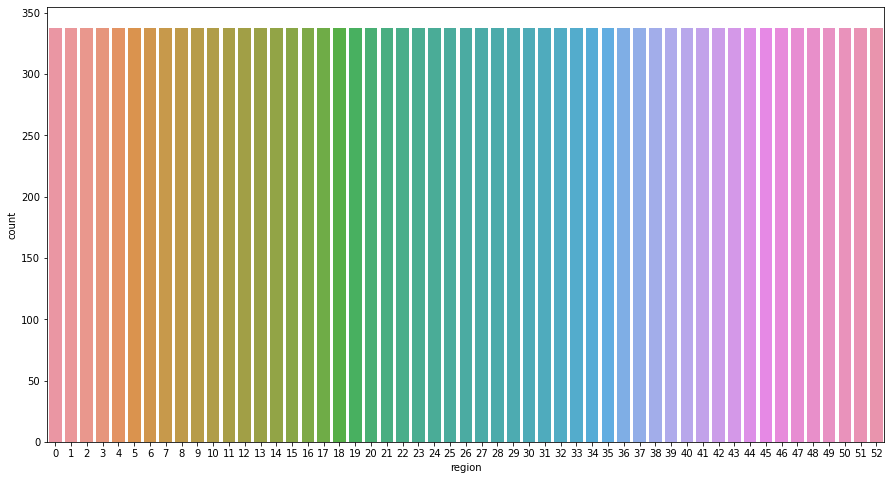

In [155]:
plt.figure(figsize=(15,8))
sns.countplot(dfy)
plt.show()

##### We see that the dataset is now balanced

### Scaling the Model

In [156]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(dfx)
X

array([[-1.97046535, -0.19975699, -0.64032465, ...,  1.4903867 ,
         1.1338384 , -1.1338384 ],
       [-1.79250706, -0.14561654, -0.76863358, ...,  1.4903867 ,
         1.1338384 , -1.1338384 ],
       [-1.6470973 , -1.38691191, -0.72006864, ...,  1.4903867 ,
         1.1338384 , -1.1338384 ],
       ...,
       [ 1.16179402, -0.459855  , -0.41993107, ..., -1.26035286,
        -0.88197854,  0.88197854],
       [ 0.47524224, -1.92859694,  1.72866069, ..., -0.23135617,
         1.1338384 , -1.1338384 ],
       [ 0.4243249 ,  0.64071298, -0.3252345 , ..., -0.22915898,
        -0.88197854,  0.88197854]])

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [158]:
lr = LogisticRegression()
max_accuracy = 0
max_random_state = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,dfy,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_random_state = i
print('The best accuracy is ', max_accuracy ,'for random_state', max_random_state)

The best accuracy is  0.5452109845947756 for random_state 72


In [59]:
lr = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X,dfy,test_size=0.25,random_state=72)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.5438713998660415
              precision    recall  f1-score   support

           0       0.48      0.52      0.50        88
           1       0.33      0.52      0.40        83
           2       0.60      0.69      0.64        83
           3       0.60      0.44      0.51        90
           4       0.49      0.50      0.50        86
           5       0.62      0.47      0.53        92
           6       0.91      0.95      0.93        93
           7       0.58      0.81      0.67        80
           8       0.68      0.74      0.71        82
           9       0.49      0.81      0.61        84
          10       0.70      0.44      0.54        90
          11       0.54      0.64      0.59        80
          12       0.53      0.59      0.56        80
          13       0.14      0.13      0.14        85
          14       0.64      0.53      0.58        90
          15       0.82      0.87      0.84        87
          16       0.56      0.56      0.56        88
        

In [59]:
from sklearn.model_selection import cross_val_score

In [61]:
for j in range(25,201,25):
    cv = cross_val_score(lr,X,dfy,cv=j)
    cv_score = cv.mean()
    print('at',j,'cross validation score is',cv_score,'and the accuracy is',accuracy)

at 25 cross validation score is 0.4948583093740991 and the accuracy is 0.5438713998660415
at 50 cross validation score is 0.5163209411618244 and the accuracy is 0.5438713998660415
at 75 cross validation score is 0.5226452421972972 and the accuracy is 0.5438713998660415
at 100 cross validation score is 0.5283333333333333 and the accuracy is 0.5438713998660415
at 125 cross validation score is 0.531424630924631 and the accuracy is 0.5438713998660415
at 150 cross validation score is 0.5348244631185808 and the accuracy is 0.5438713998660415
at 175 cross validation score is 0.5372451116368877 and the accuracy is 0.5438713998660415
at 200 cross validation score is 0.5365 and the accuracy is 0.5438713998660415


In [56]:
def Model(model):
    x_train,x_test,y_train,y_test = train_test_split(X,dfy,test_size=0.2,random_state=72)
    model.fit(x_test,y_test)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100
    cv = cross_val_score(model,X,dfy,cv=200)
    cv_score = cv.mean()*100
    print('Report for model', model)
    print('The Accuracy Score is', accuracy)
    print('Confussion Matrix :','\n',confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Cross Validation Score is ', cv_score)
    print()
    print('Difference between accuracy score and cv is',accuracy-cv_score)

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
Model(lr)

Report for model LogisticRegression()
The Accuracy Score is 54.78649176667597
Confussion Matrix : 
 [[38  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  3]
 ...
 [ 0  7  0 ...  9  0  0]
 [ 0  0  0 ...  0 68  0]
 [ 0  3  0 ...  0  0 20]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        68
           1       0.27      0.52      0.35        69
           2       0.60      0.57      0.58        65
           3       0.59      0.58      0.58        71
           4       0.66      0.57      0.61        65
           5       0.54      0.49      0.51        80
           6       0.87      0.95      0.91        77
           7       0.58      0.60      0.59        58
           8       0.62      0.71      0.66        62
           9       0.55      0.89      0.68        64
          10       0.55      0.46      0.50        69
          11       0.52      0.66      0.58        64
          12       0.51      0.60      0.

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Model(knn)

Report for model KNeighborsClassifier()
The Accuracy Score is 67.87608149595312
Confussion Matrix : 
 [[57  0  0 ...  1  0  0]
 [ 0 54  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 2  4  0 ... 21  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  3  0 ...  0  0 40]]
              precision    recall  f1-score   support

           0       0.55      0.84      0.66        68
           1       0.44      0.78      0.57        69
           2       0.59      0.91      0.72        65
           3       0.63      0.83      0.72        71
           4       0.63      0.74      0.68        65
           5       0.61      0.72      0.66        80
           6       0.79      0.87      0.83        77
           7       0.59      0.79      0.68        58
           8       0.74      0.81      0.77        62
           9       0.55      0.73      0.63        64
          10       0.39      0.68      0.49        69
          11       0.69      0.88      0.77        64
          12       0.84      0.82      

Report for model DecisionTreeClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[68  0  0 ...  0  0  0]
 [ 0 69  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        71
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        77
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00        62
           9       1.00      1.00      1.00        64
          10       1.00      1.00      1.00        69
          11       1.00      1.00      1.00        64
          12       1.00      1.00      1.00      

<AxesSubplot:title={'center':'Model Coefficients'}>

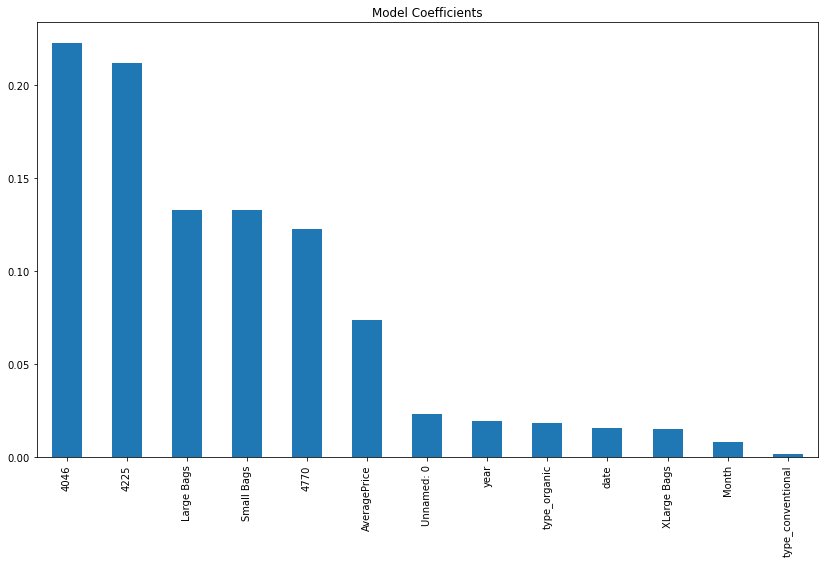

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
Model(dtc)
coef = pd.Series(dtc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))

Report for model RandomForestClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[68  0  0 ...  0  0  0]
 [ 0 69  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        71
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        77
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00        62
           9       1.00      1.00      1.00        64
          10       1.00      1.00      1.00        69
          11       1.00      1.00      1.00        64
          12       1.00      1.00      1.00      

<AxesSubplot:title={'center':'Model Coefficients'}>

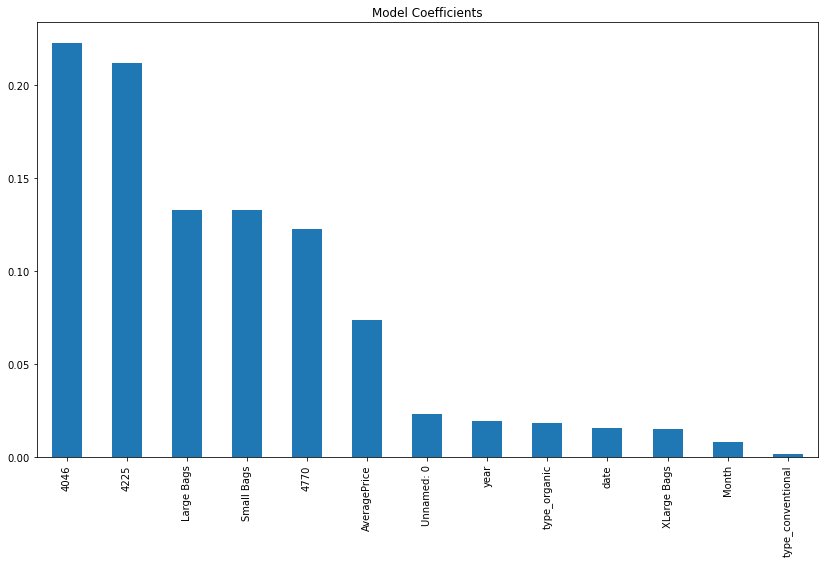

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
Model(rfc)
coef = pd.Series(dtc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))

Report for model ExtraTreesClassifier()
The Accuracy Score is 100.0
Confussion Matrix : 
 [[68  0  0 ...  0  0  0]
 [ 0 69  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        71
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        77
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00        62
           9       1.00      1.00      1.00        64
          10       1.00      1.00      1.00        69
          11       1.00      1.00      1.00        64
          12       1.00      1.00      1.00        

<AxesSubplot:title={'center':'Model Coefficients'}>

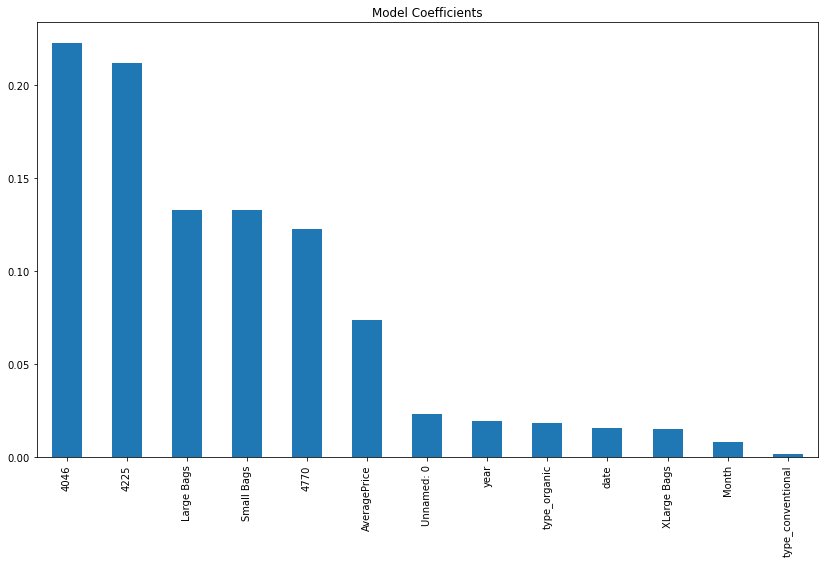

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
Model(etc)
coef = pd.Series(dtc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))

We See the least difference between accuracy and cv score in Logistic Regression and KNN off all the Models

### HyperParameter Tuning

In [85]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
parameters = parameters = {  'n_neighbors'   : np.arange(2, 30),
                'weights'       : ['uniform', 'distance'],
                'metric'        : ['euclidean', 'manhattan', 
                                   'chebyshev', 'minkowski'],
                'algorithm'     : ['ball_tree', 'kd_tree']
            }
gcv = GridSearchCV(knn,parameters,cv=200)
gcv.fit(x_train,y_train)
gcv.best_params_

{'algorithm': 'ball_tree',
 'metric': 'manhattan',
 'n_neighbors': 25,
 'weights': 'distance'}

In [86]:
gcv.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=25,
                     weights='distance')

In [88]:
knn = KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=25,
                     weights='distance')

In [89]:
Model(knn)

Report for model KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=25,
                     weights='distance')
The Accuracy Score is 100.0
Confussion Matrix : 
 [[68  0  0 ...  0  0  0]
 [ 0 69  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        71
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        77
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00        62
           9       1.00      1.00      1.00        64
          10       1.00      1.00      1.00        69
       

In [83]:
et = ExtraTreesClassifier()
parameters={
        'n_estimators': list(range(25,126,25)),
        'min_samples_leaf': list(range(20,50,5)),
        'criterion':["gini", "entropy"]
    }
gcv = GridSearchCV(et,parameters,cv=200)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'min_samples_leaf': 20, 'n_estimators': 125}

In [84]:
gcv.best_estimator_

ExtraTreesClassifier(min_samples_leaf=20, n_estimators=125)

Report for model ExtraTreesClassifier(min_samples_leaf=20, n_estimators=125)
The Accuracy Score is 83.22634663689645
Confussion Matrix : 
 [[59  0  0 ...  0  0  0]
 [ 0 58  0 ...  1  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  1  0 ... 39  0  0]
 [ 0  0  0 ...  0 68  0]
 [ 0  0  2 ...  0  0 58]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        68
           1       0.73      0.84      0.78        69
           2       0.95      0.91      0.93        65
           3       0.84      0.93      0.88        71
           4       0.96      0.83      0.89        65
           5       0.90      0.82      0.86        80
           6       0.97      0.96      0.97        77
           7       0.83      0.60      0.70        58
           8       0.85      0.98      0.91        62
           9       0.79      0.91      0.85        64
          10       0.82      0.88      0.85        69
          11       0.90      0.95      0.92        64
  

<AxesSubplot:title={'center':'Model Coefficients'}>

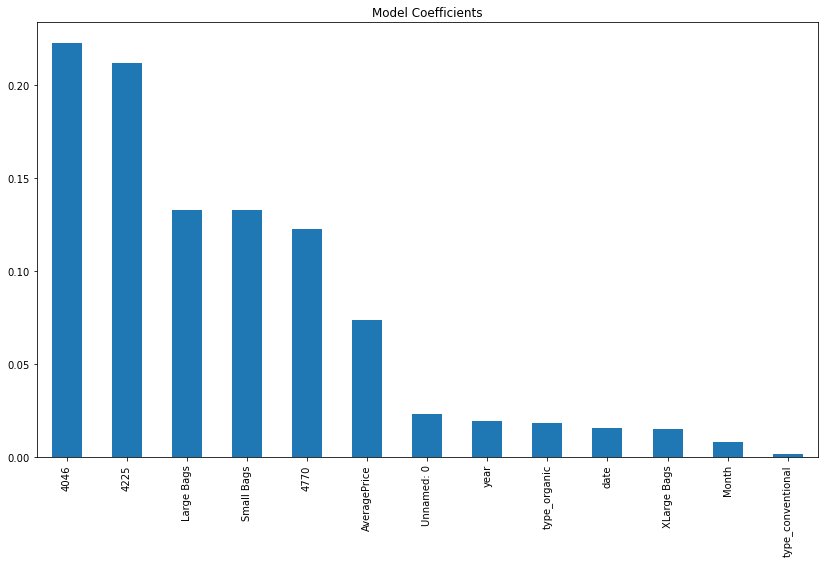

In [87]:
et = ExtraTreesClassifier(min_samples_leaf=20, n_estimators=125)

Model(et)
coef = pd.Series(et.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))

##### We see ExtraTree Classifier has the lowest difference in cv and accuracy score hence can be chosen as a final model

# Final Model Classification:ExtraTreesClassifier With Hyper Parameter Tuning

Report for model ExtraTreesClassifier(min_samples_leaf=20, n_estimators=125)
The Accuracy Score is 83.31007535584706
Confussion Matrix : 
 [[57  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  1  0 ... 42  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  1 ...  0  1 57]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        68
           1       0.73      0.80      0.76        69
           2       0.94      0.89      0.91        65
           3       0.88      0.93      0.90        71
           4       0.92      0.85      0.88        65
           5       0.90      0.81      0.86        80
           6       0.96      0.99      0.97        77
           7       0.90      0.66      0.76        58
           8       0.81      1.00      0.89        62
           9       0.77      0.88      0.82        64
          10       0.79      0.86      0.82        69
          11       0.94      0.95      0.95        64
  

<AxesSubplot:title={'center':'Model Coefficients'}>

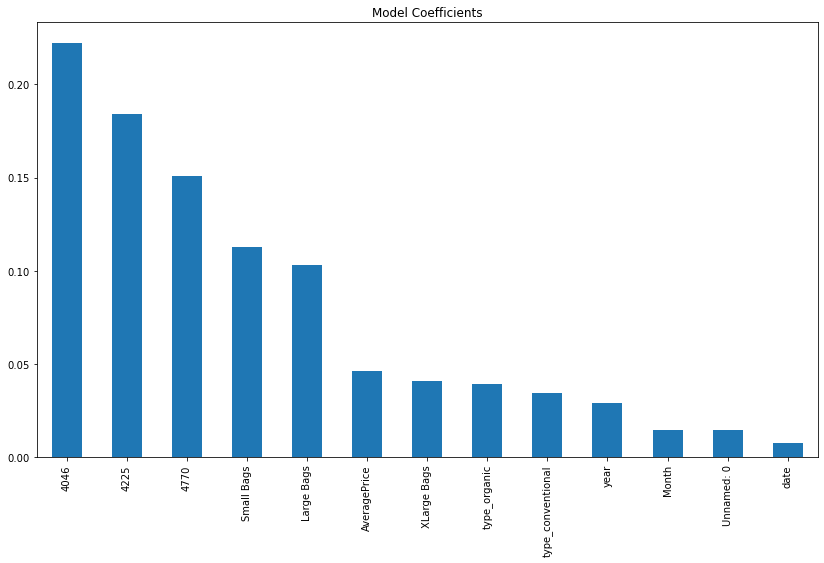

In [162]:
et = ExtraTreesClassifier(min_samples_leaf=20, n_estimators=125)

Model(et)
coef = pd.Series(et.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))

### Saving Classification Model

In [163]:
file_name = 'Predict_Avacado_Region'
import pickle
pickle.dump(et,open(file_name,'wb'))

### Regression Model :Predicting Average Price

In [63]:
df

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  year  region  date  \
0         8696.87     8603.62       93.25          0.0  2015       0    27   
1         9505.56     9408.07       97.49          0.0  2015       0    20   
2         8145.35     8042.21      103.14          0.0  2015       0    13   
3         5811.16     5677.40      133.76          0.0  2015       0     6   
4         6183.95     5986.26      197.69          0.0  2015       0    29   
...           ...         ...         ...          ...   ...     ...   ...   
18244    13498.67    13066.82      431.85          0.0  2018      52     4   
18245     9264.84     8940.04      324.80          0.0  2018      52    28   
18246     9394.11     9351.80       42.31          0.0  2018      52    21   
18247    10969.54    10919.54       50.00          0.0  2018      52    14   
18248    12014.15    11988.14       26.01          0.0  2018      52     7   

       Month  type_conventional  type_organic  
0         12                  1             0  
1         12                  1             0  
2         12                  1             0  
3         12                  1             0  
4         11                  1             0  
...      ...                ...           ...  
18244      2                  0             1  
18245      1                  0             1  
18246      1                  0             1  
18247      1                  0             1  
18248      1                  0             1  

[16489 rows x 16 columns]

In [64]:
x = df.drop('AveragePrice',axis=1)
x.shape

(16489, 15)

In [65]:
y = df['AveragePrice']
y.shape

(16489,)

### Normalizing the data using power_transform

In [66]:
x.skew().sort_values(ascending = False)

XLarge Bags          5.605643
4770                 5.120946
Large Bags           4.353749
4046                 3.975794
Small Bags           3.969263
Total Bags           3.645998
4225                 3.534576
Total Volume         3.147350
year                 0.224731
type_conventional    0.142651
Unnamed: 0           0.110679
Month                0.103318
date                 0.011383
region               0.004348
type_organic        -0.142651
dtype: float64

Lets keep the skewness threshold as 1.25

In [67]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [68]:
x = pd.DataFrame(x_new,columns=x.columns)
x

Unnamed: 0  Total Volume      4046      4225      4770  Total Bags  \
0       -1.966757      0.016606 -0.600481  0.496206 -0.106016   -0.499509   
1       -1.789347     -0.062536 -0.726240  0.403250 -0.056234   -0.457084   
2       -1.644385      0.328869 -0.678640  0.838242  0.151887   -0.530478   
3       -1.517151      0.121436 -0.574326  0.630222  0.000467   -0.686248   
4       -1.401661     -0.098767 -0.628979  0.394891  0.011644   -0.658042   
...           ...           ...       ...       ...       ...         ...   
16484   -1.099530     -0.630952 -0.393942 -0.894934 -1.192086   -0.285207   
16485   -1.009046     -0.728248 -0.558962 -0.627302 -1.192086   -0.469370   
16486   -0.922336     -0.732357 -0.558906 -0.741456  0.585816   -0.462737   
16487   -0.838885     -0.655663 -0.483960 -0.675672  0.585499   -0.387764   
16488   -0.758291     -0.619585 -0.285008 -0.754837  0.290594   -0.343117   

       Small Bags  Large Bags  XLarge Bags      year    region      date  \
0       -0.294546   -0.726466    -0.627473 -1.214835 -1.993242  1.228554   
1       -0.254451   -0.716060    -0.627473 -1.214835 -1.993242  0.538521   
2       -0.324465   -0.702806    -0.627473 -1.214835 -1.993242 -0.219208   
3       -0.474167   -0.640626    -0.627473 -1.214835 -1.993242 -1.094895   
4       -0.451890   -0.543996    -0.627473 -1.214835 -1.993242  1.416572   
...           ...         ...          ...       ...       ...       ...   
16484   -0.102426   -0.338939    -0.627473  1.975660  1.561384 -1.385174   
16485   -0.277406   -0.415551    -0.627473  1.975660  1.561384  1.323008   
16486   -0.257159   -0.903225    -0.627473  1.975660  1.561384  0.640578   
16487   -0.186424   -0.867164    -0.627473  1.975660  1.561384 -0.105484   
16488   -0.143019   -1.004264    -0.627473  1.975660  1.561384 -0.958572   

          Month  type_conventional  type_organic  
0      1.489591           1.073859     -1.073859  
1      1.489591           1.073859     -1.073859  
2      1.489591           1.073859     -1.073859  
3      1.489591           1.073859     -1.073859  
4      1.273686           1.073859     -1.073859  
...         ...                ...           ...  
16484 -1.221786          -0.931221      0.931221  
16485 -1.641575          -0.931221      0.931221  
16486 -1.641575          -0.931221      0.931221  
16487 -1.641575          -0.931221      0.931221  
16488 -1.641575          -0.931221      0.931221  

[16489 rows x 15 columns]

In [69]:
x.skew()

Unnamed: 0          -0.242414
Total Volume        -0.036696
4046                -0.051553
4225                -0.072390
4770                 0.047409
Total Bags          -0.059451
Small Bags          -0.073857
Large Bags          -0.125451
XLarge Bags          1.009043
year                 0.222468
region              -0.264759
date                -0.208962
Month               -0.147660
type_conventional    0.142651
type_organic        -0.142651
dtype: float64

All the columns arer within the skewness Threshold

### VIF

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
    return vif.sort_values(by='VIF_Values',ascending=False)

In [72]:
check_vif = ['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']
Features = x[check_vif]
calculate_vif(Features)

Features  VIF_Values
0  Total Volume   47.317447
4    Total Bags   32.195703
5    Small Bags   16.250995
2          4225   10.474220
1          4046    6.175370
6    Large Bags    3.260421
3          4770    3.014952
7   XLarge Bags    1.643017

In [73]:
Features

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.016606 -0.600481  0.496206 -0.106016   -0.499509   -0.294546   
1         -0.062536 -0.726240  0.403250 -0.056234   -0.457084   -0.254451   
2          0.328869 -0.678640  0.838242  0.151887   -0.530478   -0.324465   
3          0.121436 -0.574326  0.630222  0.000467   -0.686248   -0.474167   
4         -0.098767 -0.628979  0.394891  0.011644   -0.658042   -0.451890   
...             ...       ...       ...       ...         ...         ...   
16484     -0.630952 -0.393942 -0.894934 -1.192086   -0.285207   -0.102426   
16485     -0.728248 -0.558962 -0.627302 -1.192086   -0.469370   -0.277406   
16486     -0.732357 -0.558906 -0.741456  0.585816   -0.462737   -0.257159   
16487     -0.655663 -0.483960 -0.675672  0.585499   -0.387764   -0.186424   
16488     -0.619585 -0.285008 -0.754837  0.290594   -0.343117   -0.143019   

       Large Bags  XLarge Bags  
0       -0.726466    -0.627473  
1       -0.716060    -0.627473  
2       -0.702806    -0.627473  
3       -0.640626    -0.627473  
4       -0.543996    -0.627473  
...           ...          ...  
16484   -0.338939    -0.627473  
16485   -0.415551    -0.627473  
16486   -0.903225    -0.627473  
16487   -0.867164    -0.627473  
16488   -1.004264    -0.627473  

[16489 rows x 8 columns]

In [74]:
Features.drop(['XLarge Bags','Large Bags','Small Bags','Total Volume'],axis=1,inplace=True)

In [75]:
calculate_vif(Features)

Features  VIF_Values
3  Total Bags    3.565122
1        4225    3.488113
0        4046    2.823140
2        4770    2.819797

In [76]:
x.drop(['XLarge Bags','Large Bags','Small Bags','Total Volume'],axis=1,inplace=True)

In [77]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(x)
X

array([[0.        , 0.36600598, 0.60792636, ..., 1.        , 1.        ,
        0.        ],
       [0.05035536, 0.3380695 , 0.58890853, ..., 1.        , 1.        ,
        0.        ],
       [0.09150075, 0.34864346, 0.67790378, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.29644417, 0.37524154, 0.3547126 , ..., 0.        , 0.        ,
        1.        ],
       [0.32013036, 0.39189033, 0.36817131, ..., 0.        , 0.        ,
        1.        ],
       [0.34300589, 0.4360864 , 0.35197492, ..., 0.        , 0.        ,
        1.        ]])

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [79]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print('At random_state',i,'the training accuracy is',r2_score(y_train,pred_train))
    print('At random_state',i,'the testing accuracy is',r2_score(y_test,pred_test))
    print()

At random_state 0 the training accuracy is 0.5174814693636948
At random_state 0 the testing accuracy is 0.5095045695921889

At random_state 1 the training accuracy is 0.5104572945242601
At random_state 1 the testing accuracy is 0.5370883161032718

At random_state 2 the training accuracy is 0.5192121256685143
At random_state 2 the testing accuracy is 0.5024948368848884

At random_state 3 the training accuracy is 0.5128940607317127
At random_state 3 the testing accuracy is 0.5273583891074772

At random_state 4 the training accuracy is 0.5159181241660931
At random_state 4 the testing accuracy is 0.5157440018760395

At random_state 5 the training accuracy is 0.5120239809676441
At random_state 5 the testing accuracy is 0.5306975027484393

At random_state 6 the training accuracy is 0.5141735985725345
At random_state 6 the testing accuracy is 0.5227144398998795

At random_state 7 the training accuracy is 0.5117035206030982
At random_state 7 the testing accuracy is 0.5328007988735622

At rando

In [80]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=38)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5132563387628984


### Cross-Validation of the Model

In [81]:
Training_Accuracy = r2_score(y_train,pred_train)
Testing_Accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(25,151,25):
    cv_score = cross_val_score(lr,x_train,y_train,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Training_Accuracy} and the accuracy for testing is {Testing_Accuracy}")
    print()

At cross fold 25 the cv score is 0.514665028121599 and the accuracy score for training is -0.49996777471273424 and the accuracy for testing is 0.5132563387628984

At cross fold 50 the cv score is 0.5124586235868331 and the accuracy score for training is -0.49996777471273424 and the accuracy for testing is 0.5132563387628984

At cross fold 75 the cv score is 0.5111113999354241 and the accuracy score for training is -0.49996777471273424 and the accuracy for testing is 0.5132563387628984

At cross fold 100 the cv score is 0.5101891186029358 and the accuracy score for training is -0.49996777471273424 and the accuracy for testing is 0.5132563387628984

At cross fold 125 the cv score is 0.5089394670242602 and the accuracy score for training is -0.49996777471273424 and the accuracy for testing is 0.5132563387628984

At cross fold 150 the cv score is 0.5060598789380654 and the accuracy score for training is -0.49996777471273424 and the accuracy for testing is 0.5132563387628984



In [91]:
def Model_Reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x_train,y_train,cv = 50)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    coef = pd.Series(lr.coef_,x.columns).sort_values(ascending=False)
    coef.plot(kind= 'bar', title = 'Model Coefficients')
    plt.show()
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [83]:
def Model_Tree(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x_train,y_train,cv = 50)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
    coef.plot(kind= 'bar', title = 'Model Coefficients')
    plt.show()
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

Model Report
MSE 0.06992496207220149
Mean Absolute Error 0.20984906452371446
r2_score 51.32563387628984
CV 51.24586235868331


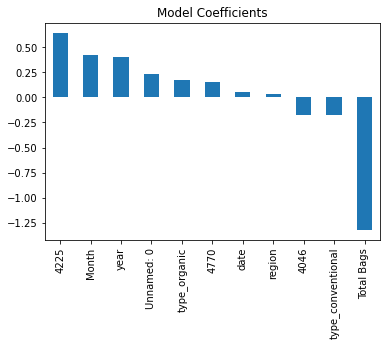

Difference between r2_score and cv is  0.079771517606531


In [92]:
Model_Reg(lr)

Model Report
MSE 0.06989867371657972
Mean Absolute Error 0.20984906452371446
r2_score 51.32563387628984
CV 51.24662717484095


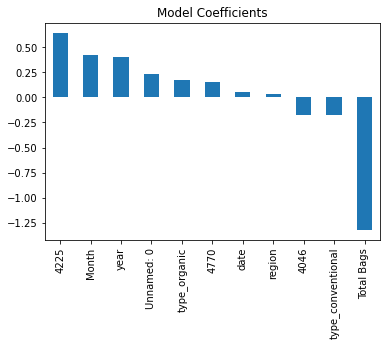

Difference between r2_score and cv is  0.07900670144888977


In [85]:
from sklearn.linear_model import Ridge
ridge = Ridge()
Model_Reg(ridge)

Model Report
MSE 0.06844151407399414
Mean Absolute Error 0.20984906452371446
r2_score 51.32563387628984
CV 52.7757521589469


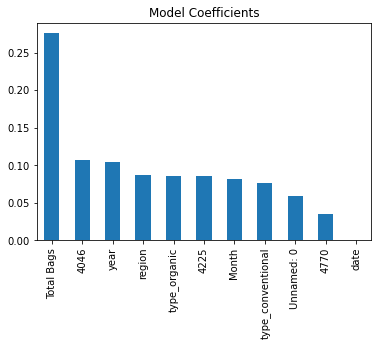

Difference between r2_score and cv is  -1.4501182826570584


In [86]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()
Model_Tree(ad)

### HyperParameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [209]:
Parameters = {'n_estimators':list(range(0,50,5)),
             'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
             'loss':['linear', 'square', 'exponential']}
gcv = GridSearchCV(ad,Parameters,cv=50,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 35}

In [210]:
gcv.best_estimator_

AdaBoostRegressor(loss='square', n_estimators=35)

Model Report
MSE 0.06701891694733038
Mean Absolute Error 0.20984906452371446
r2_score 51.32563387628984
CV 53.867674977623246


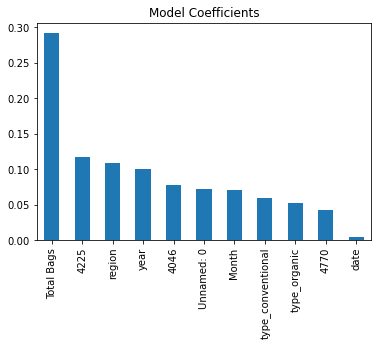

Difference between r2_score and cv is  -2.542041101333403


In [212]:
ad = AdaBoostRegressor(loss='square', n_estimators=35)

Model_Tree(ad)

In [102]:
ridge = Ridge()
Parameters = {'alpha':[0.001,0.01,0.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
gcv = GridSearchCV(ridge,Parameters,cv=50,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'alpha': 0.01, 'solver': 'lsqr'}

In [103]:
gcv.best_estimator_

Ridge(alpha=0.01, solver='lsqr')

Model Report
MSE 0.06989213365705838
Mean Absolute Error 0.20984906452371446
r2_score 51.32563387628984
CV 51.25273583127029


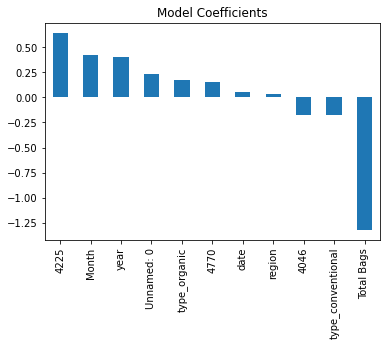

Difference between r2_score and cv is  0.07289804501954933


In [104]:
ridge = Ridge(alpha=0.01, solver='lsqr')
Model_Reg(ridge)

### Best Model : Ridge with Hyper Parameter Tuning

Model Report
MSE 0.06989213365705838
Mean Absolute Error 0.20984906452371446
r2_score 51.32563387628984
CV 51.25273583127029


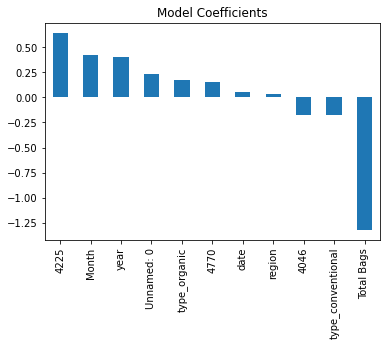

Difference between r2_score and cv is  0.07289804501954933


In [105]:
ridge = Ridge(alpha=0.01, solver='lsqr')
Model_Reg(ridge)

### Saving Best Liear Model

In [106]:
file_name = 'Predict_Avacado_Average_Price'
import pickle
pickle.dump(ridge,open(file_name,'wb'))